In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración
np.random.seed(42)
n_samples = 10000
# Generar variable TEMPERATURA
temperatura = np.random.uniform(15, 35, n_samples)
# Generar variable VENTAS DE HELADO
ventas_helado = 50 + 8 * temperatura + np.random.normal(0, 15, n_samples)
# Generar variable AHOGAMIENTOS
ahogamientos = 1 + 0.15 * temperatura + np.random.normal(0, 0.5, n_samples)
# Creación del dataframe
df = pd.DataFrame({
'temperatura': temperatura,
'ventas_helado': ventas_helado.clip(min=0),
'ahogamientos': ahogamientos.clip(min=0)
})

**Analizamos las correlaciones directas **\
Trataremos de explicar que, a pesar de que la correlación directa entre ventas de helado y ahogamientos es elevada, esta no es una relación causal, si no espuria.

In [3]:
corr_directa = df['ventas_helado'].corr(df['ahogamientos'])
corr_directa

np.float64(0.8268320544053335)

Como podemos observar, la correlación directa es de 0.826, lo cual indica una
correlación positiva entre ambas variables (cuando una aumenta, la otra también lo
hace).


**Visualizamos gráficamente los datos**

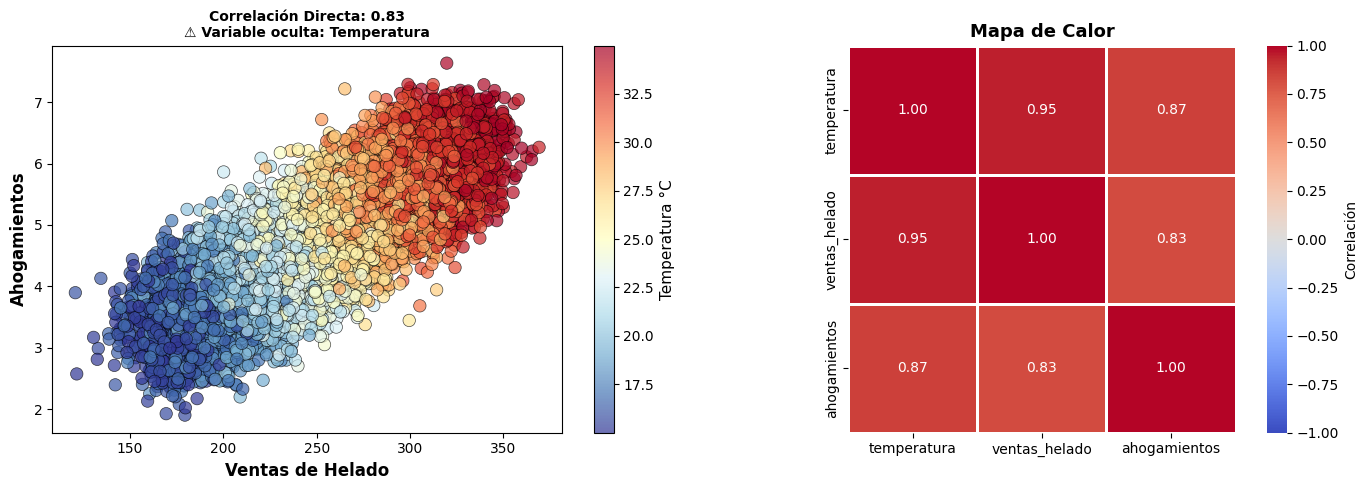

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Scatter coloreado por temperatura
scatter = axes[0].scatter(df['ventas_helado'], df['ahogamientos'],
                          c=df['temperatura'], cmap='RdYlBu_r',
                          alpha=0.7, s=80, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Ventas de Helado', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Ahogamientos', fontsize=12, fontweight='bold')
axes[0].set_title(f'Correlación Directa: {corr_directa:.2f}\n⚠️ Variable oculta: Temperatura',
                  fontsize=10, fontweight='bold')
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Temperatura °C', fontsize=11)

# Gráfico 2: Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=2,
            cbar_kws={'label': 'Correlación'}, ax=axes[1],
            vmin=-1, vmax=1)
axes[1].set_title(f'Mapa de Calor',
                  fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

Analizamos las correlaciones parciales (controlamos la variable
temperatura) **texto en negrita**

In [7]:
# Función correlación parcial
def correlacion_parcial(df, x, y, control):
  rxy = df[x].corr(df[y])
  rxc = df[x].corr(df[control])
  ryc = df[y].corr(df[control])
  return (rxy - rxc * ryc) / (np.sqrt(1 - rxc**2) * np.sqrt(1 - ryc**2))
# Correlación parcial (controlando temperatura)
corr_parcial = correlacion_parcial(df, 'ventas_helado', 'ahogamientos', 'temperatura')
corr_parcial

np.float64(0.021382833371945242)

OBSERVAMOS QUE LA CORRELACIÓN PARCIAL CUANDO CONTROLAMOS LA
VARIABLE TEMPERATURA ES DE 0.021, LO CUAL INDICA QUE LA CORRELACIÓN
DIRECTA QUE ANTES VEÍAMOS DE 0.826 NO ES UNA CORRELACIÓN CAUSAL

In [9]:
corr_parcial_temp_vh = correlacion_parcial(df, 'ventas_helado', 'temperatura', 'ahogamientos')
corr_parcial_temp_vh

np.float64(0.8334847742862783)

In [10]:
corr_parcial_temp_ah = correlacion_parcial(df, 'ahogamientos', 'temperatura', 'ventas_helado')
corr_parcial_temp_ah

np.float64(0.4608114641495465)

Sin embargo, las correlaciones parciales entre temperatura y las otras dos variables
son más elevadas, especialmente en el caso de la venta de helados, donde podemos
confirmar que existe **CAUSALIDAD**